In [98]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [79]:
df = pd.DataFrame()
df['date'] = pd.read_csv('love.csv')['date']
df['love'] = pd.read_csv('love.csv')['score']
df['vegan'] = pd.read_csv('vegan.csv')['score']
df['constellation'] = pd.read_csv('constellation.csv')['score']
df['camila'] = pd.read_csv('camila.csv')['score']
df['pepsico'] = pd.read_csv('pepsico.csv')['score']
df = df.set_index('date')
df.index = df.index.astype('datetime64')

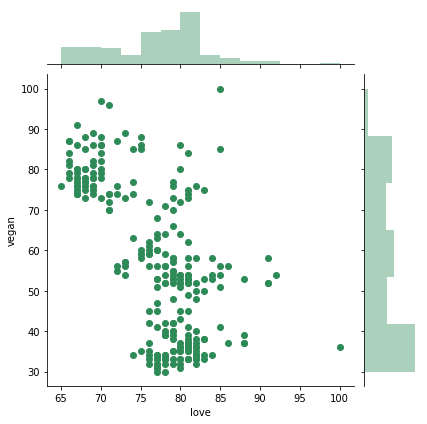

In [107]:
sns.jointplot('love','vegan', df, kind='scatter', color='seagreen')

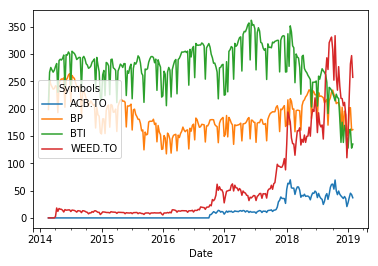

AttributeError: 'AxesSubplot' object has no attribute 'show'

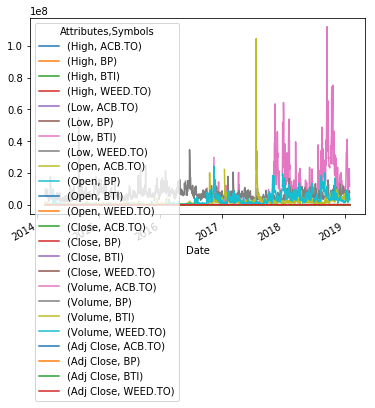

In [168]:
import pandas_datareader as pdr
import datetime
stocks = pdr.get_data_yahoo(['WEED.TO','ACB.TO','BP','BTI'],start=datetime.datetime(2014,2,16), end= datetime.datetime(2019,1,30))
stocks = stocks.resample('W').sum()['Close']
s = stocks.reset_index()
g = df.reset_index()
google_stock = g.merge(s, left_on='date', right_on='Date')
del google_stock['date']
google_stock = google_stock.set_index('Date')

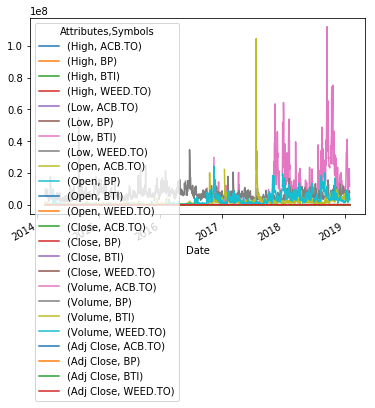

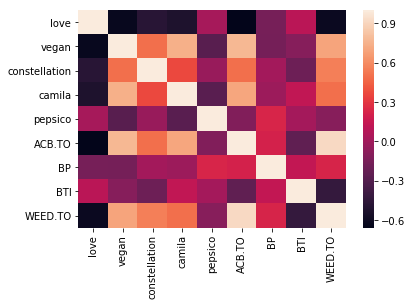

In [163]:
sns.heatmap(google_stock.corr())

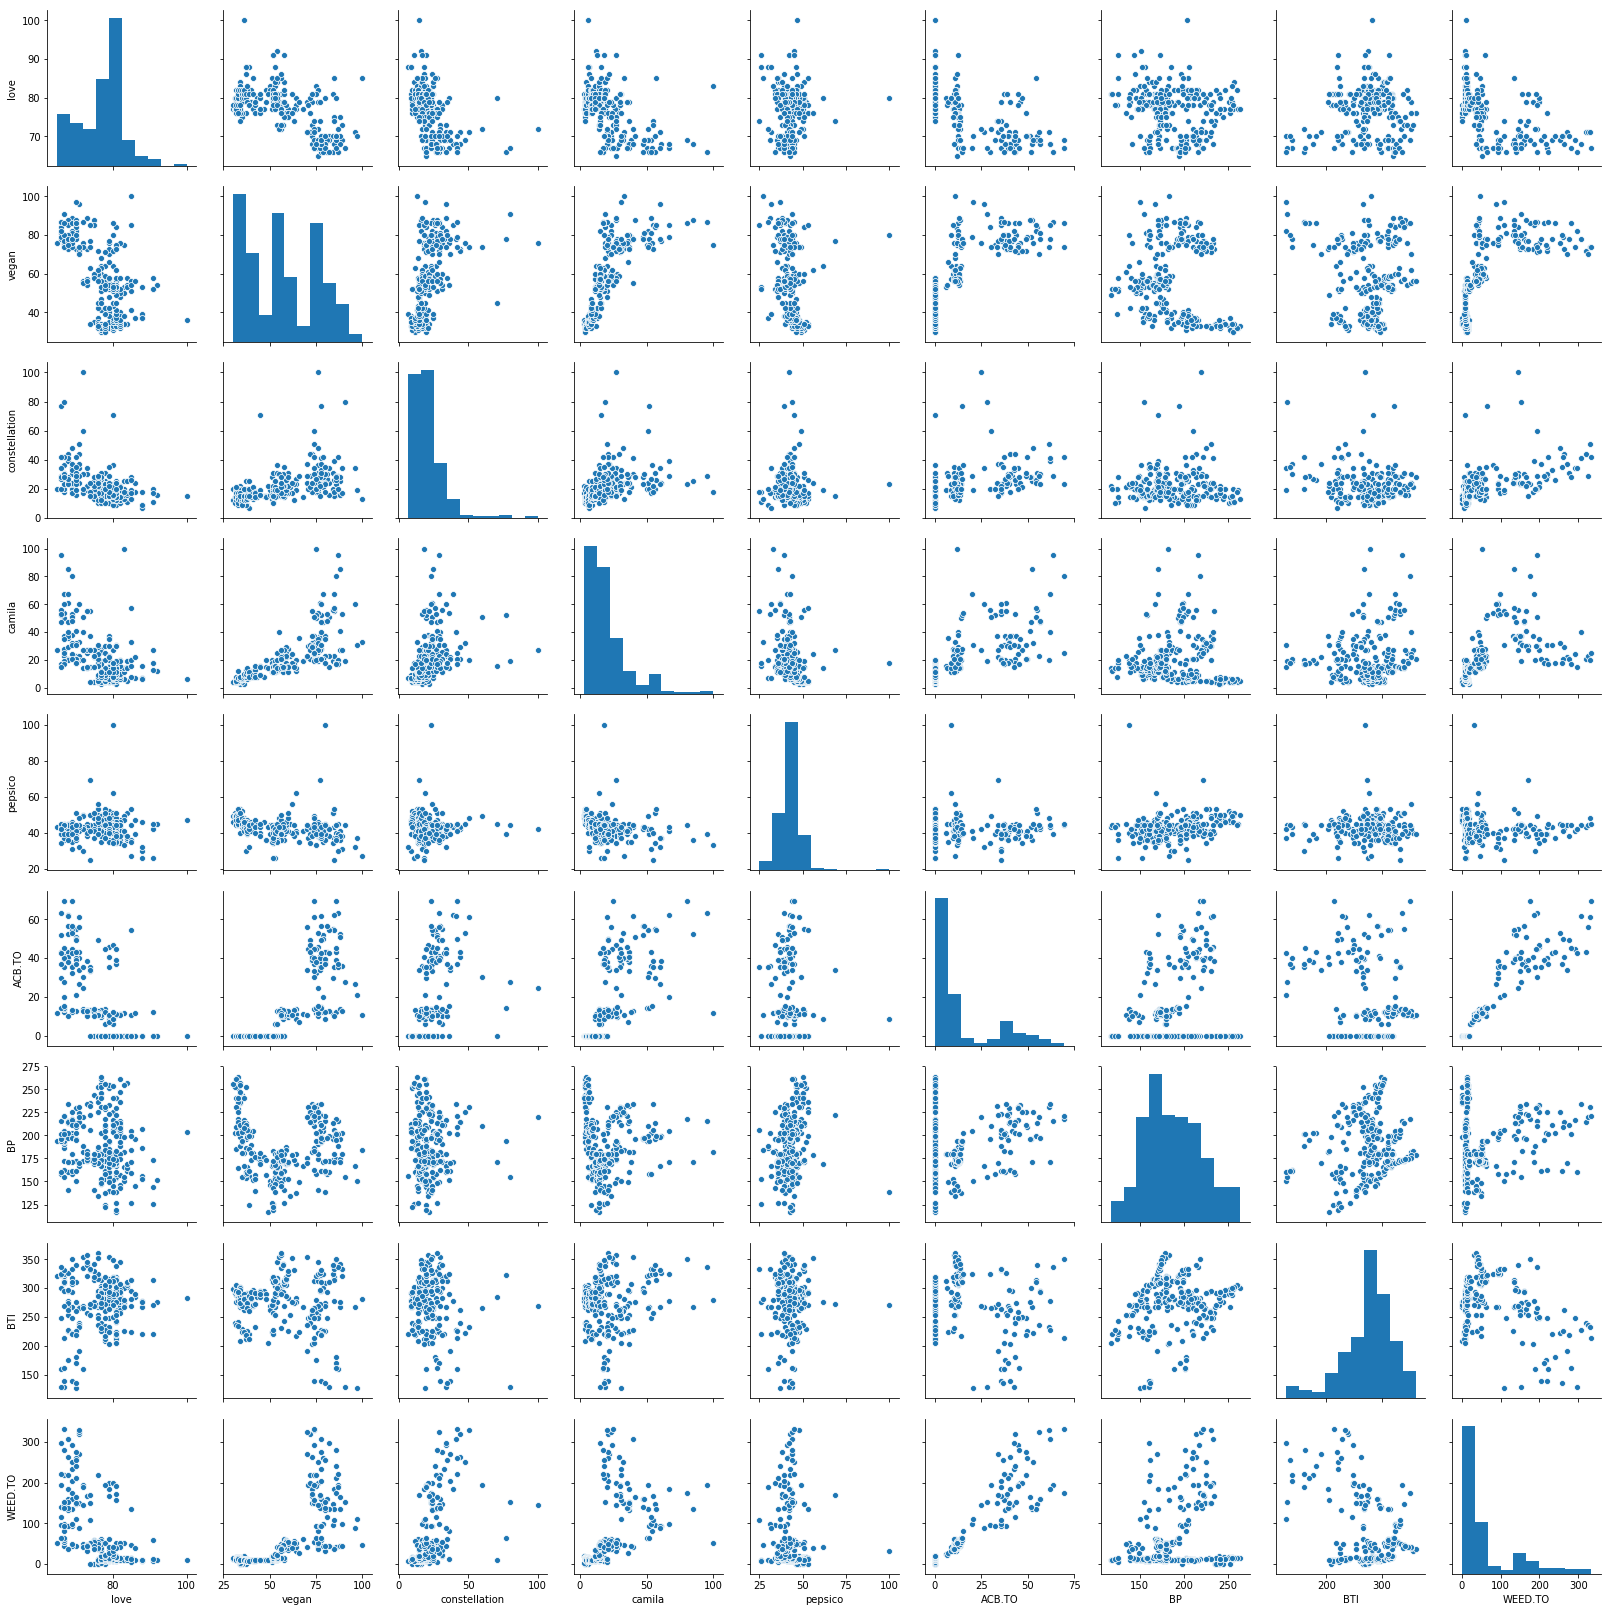

In [164]:
sns.pairplot(google_stock.dropna())

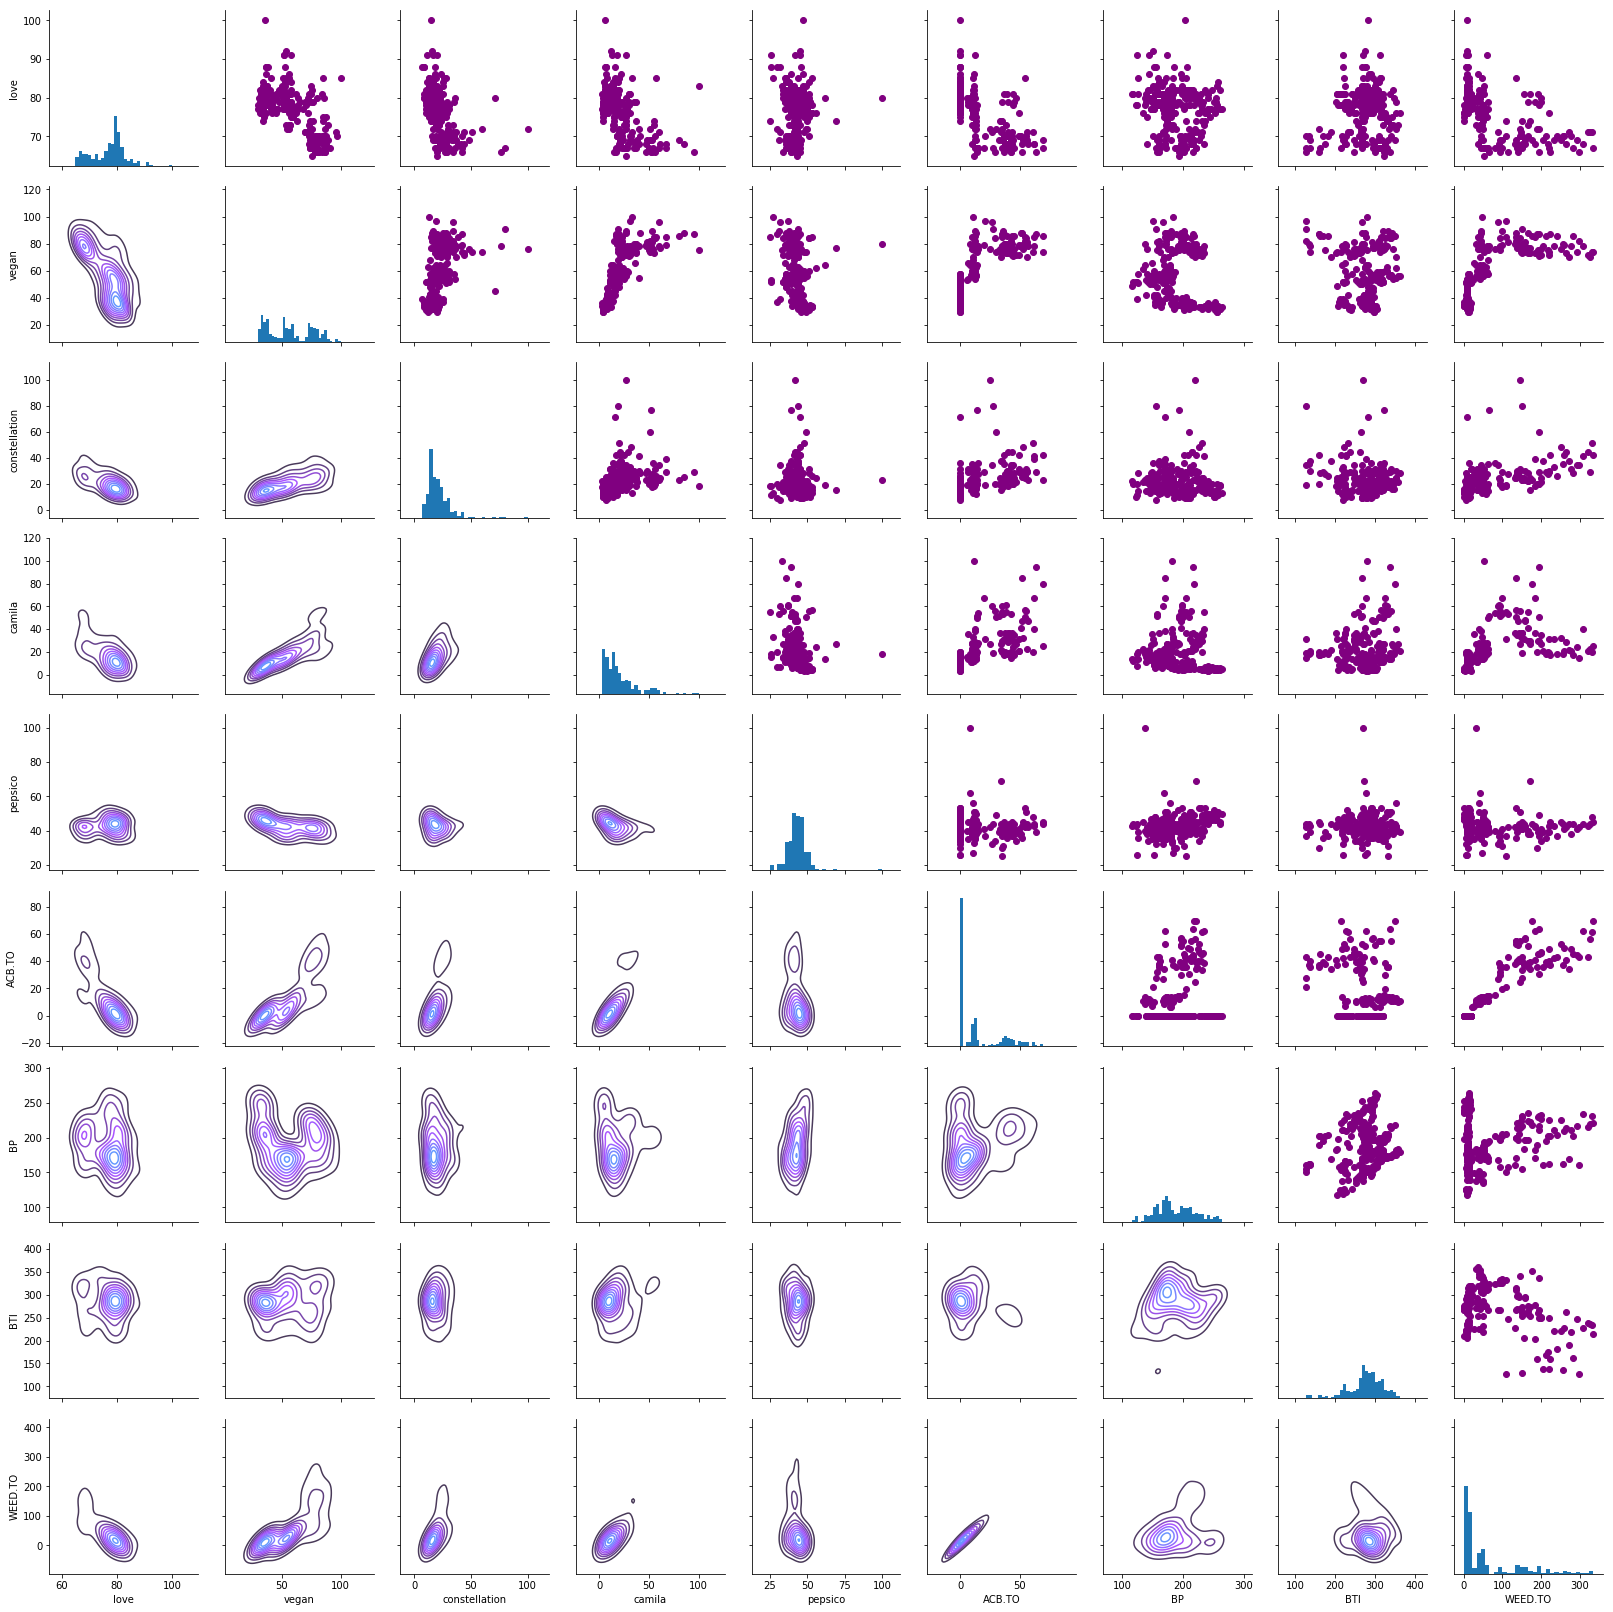

In [165]:
returns_fig = sns.PairGrid(google_stock.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)